In [36]:
from sklearn.datasets import make_blobs

In [37]:
X, y = make_blobs(200, 3, centers=3, cluster_std=0.6, random_state=0)

In [38]:
import pandas as pd
df = pd.DataFrame(X, columns=['a', 'b', 'c'])
df.head()

,a,b,c
0,0.579608,3.595673,2.173853
1,1.488134,-2.222428,2.655960
2,-1.005970,7.211443,10.025286
3,0.062948,-1.505148,2.429239
4,0.225738,4.858938,1.512396


## K-Means

In [39]:
from sklearn.cluster import KMeans

In [40]:
inertias = [0, 0]

In [41]:
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

KMeans(n_clusters=2)

In [42]:
inertias.append(kmeans.inertia_)

In [43]:
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
inertias.append(kmeans.inertia_)

In [44]:
inertias

[0, 0, 1463.1655117123723, 203.29085284324532]

In [45]:
inertias = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
inertias

[1463.1655117123723,
 203.29085284324532,
 186.06011924077455,
 166.68403809674962,
 152.50234473050637,
 140.43501258825063,
 125.80134133880976,
 131.18156895974255]

In [46]:
import matplotlib.pyplot as plt
import numpy as np

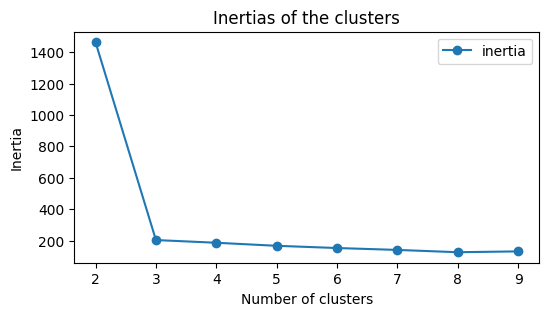

In [47]:
plt.figure(figsize=(6, 3))
plt.plot(range(2, 10), inertias, marker='o', label='inertia')
plt.title('Inertias of the clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.legend()

In [48]:
from sklearn.metrics import silhouette_score

sil_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    sil_scores.append(
        silhouette_score(X, kmeans.labels_)
    )

sil_scores

[0.5462437774074453,
 0.804222021292156,
 0.6135383625375669,
 0.4159528444794544,
 0.44239642233288384,
 0.44000344391265,
 0.2729356967027548,
 0.25730511744083784]

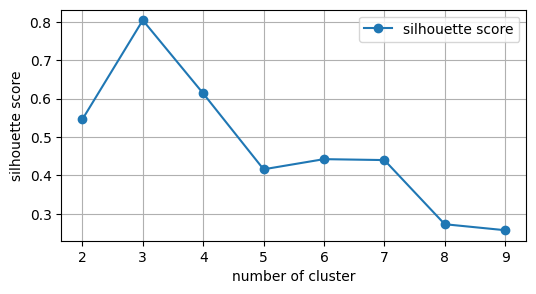

In [49]:
plt.figure(figsize=(6, 3))
plt.plot(range(2, 10), sil_scores, marker='o', label='silhouette score')
plt.legend()
plt.xlabel('number of cluster')
plt.ylabel('silhouette score')
plt.grid()

In [50]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([0, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 0,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 0, 1,
       1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1,
       2, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 1,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1,
       2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2,
       2, 0])

In [51]:
df['labels'] = kmeans.labels_

In [52]:
df

,a,b,c,labels
0,0.579608,3.595673,2.173853,0
1,1.488134,-2.222428,2.655960,2
2,-1.005970,7.211443,10.025286,1
3,0.062948,-1.505148,2.429239,2
4,0.225738,4.858938,1.512396,0
...,...,...,...,...
195,-1.712408,7.417851,9.025841,1
196,-1.489591,6.915651,10.201003,1
197,0.758952,-2.493050,3.776243,2
198,0.827119,-1.303032,2.686265,2


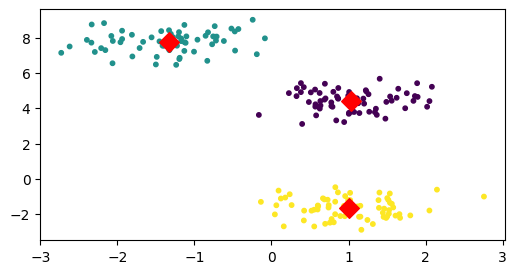

In [55]:
plt.figure(figsize=(6, 3))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o', s=10, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='D')